In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mennaw39haleem","key":"bc6207804e8b3098285b0ef046706717"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease
!unzip personal-key-indicators-of-heart-disease.zip


Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
License(s): CC0-1.0
Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: 2020/heart_2020_cleaned.csv  
  inflating: 2022/heart_2022_no_nans.csv  
  inflating: 2022/heart_2022_with_nans.csv  


## 📊 **Dataset Introduction **

This dataset is based on the 2022 CDC Behavioral Risk Factor Surveillance System (BRFSS), which surveyed over 400,000 U.S. adults about their health status. It contains key health-related features that may influence or indicate the likelihood of heart disease.
The goal is to analyze these features to understand the risk factors and to potentially train machine learning models to predict heart disease.

---

### 📋 Column Explanations:

| #  | Column                        | Explanation                                                                                             |
| -- | ----------------------------- | ------------------------------------------------------------------------------------------------------- |
| 0  | **State**                     | The U.S. state the person lives in. Useful for geographic analysis but not very helpful for prediction. |
| 1  | **Sex**                       | Gender (Male/Female). Important—men tend to have higher heart disease risk.                             |
| 2  | **GeneralHealth**             | Self-assessed overall health (Excellent–Poor). Strong indicator of overall condition.                   |
| 3  | **PhysicalHealthDays**        | Number of days (last 30) the person had poor physical health. Strong indicator.                         |
| 4  | **MentalHealthDays**          | Number of days with poor mental health. May have an indirect influence.                                 |
| 5  | **LastCheckupTime**           | Time since last medical checkup. Reflects health awareness. Medium importance.                          |
| 6  | **PhysicalActivities**        | Whether the person exercises. Very important—lack of activity increases risk.                           |
| 7  | **SleepHours**                | Average hours of sleep. Both too little and too much sleep may be risky.                                |
| 8  | **RemovedTeeth**              | How many teeth were removed. Possible general health marker.                                            |
| 9  | **HadHeartAttack**            | Whether the person had a heart attack. Could be your **target variable**.                               |
| 10 | **HadAngina**                 | History of angina (chest pain). Very important for heart disease prediction.                            |
| 11 | **HadStroke**                 | History of stroke. Closely related to heart and vascular health.                                        |
| 12 | **HadAsthma**                 | Asthma condition. Not strongly related to heart disease.                                                |
| 13 | **HadSkinCancer**             | History of skin cancer. Likely irrelevant to heart disease.                                             |
| 14 | **HadCOPD**                   | Chronic lung disease. Can strain the heart—moderate relevance.                                          |
| 15 | **HadDepressiveDisorder**     | Depression diagnosis. Some link to heart health, indirect.                                              |
| 16 | **HadKidneyDisease**          | Kidney disease is strongly linked to heart problems. Important.                                         |
| 17 | **HadArthritis**              | Arthritis. Indirect relation, less important.                                                           |
| 18 | **HadDiabetes**               | Diabetes is a major risk factor for heart disease. Very important.                                      |
| 19 | **DeafOrHardOfHearing**       | Hearing issues. Unlikely to affect heart disease directly.                                              |
| 20 | **BlindOrVisionDifficulty**   | Vision difficulty. Weak or indirect relation.                                                           |
| 21 | **DifficultyConcentrating**   | Cognitive difficulties. Could relate to health issues.                                                  |
| 22 | **DifficultyWalking**         | Difficulty walking. Important—indicates potential cardiovascular issues.                                |
| 23 | **DifficultyDressingBathing** | Difficulty with daily tasks. Could signal weak health.                                                  |
| 24 | **DifficultyErrands**         | Difficulty with errands. Similar to above.                                                              |
| 25 | **SmokerStatus**              | Smoking habits. One of the **top risk factors** for heart disease.                                      |
| 26 | **ECigaretteUsage**           | Use of e-cigarettes. May be a risk, but less studied.                                                   |
| 27 | **ChestScan**                 | Had chest imaging done. Could relate to diagnosis, moderate use.                                        |
| 28 | **RaceEthnicityCategory**     | Race or ethnicity. Some races have higher risk factors statistically.                                   |
| 29 | **AgeCategory**               | Age group. Age is a **very strong** predictor of heart disease.                                         |
| 30 | **HeightInMeters**            | Height. Not very useful for heart prediction by itself.                                                 |
| 31 | **WeightInKilograms**         | Weight. Useful if BMI isn’t available.                                                                  |
| 32 | **BMI**                       | Body Mass Index. **Important**—obesity is a key heart disease risk.                                     |
| 33 | **AlcoholDrinkers**           | Alcohol consumption. Overdrinking increases heart risk.                                                 |
| 34 | **HIVTesting**                | Whether tested for HIV. Not directly related to heart.                                                  |
| 35 | **FluVaxLast12**              | Got flu vaccine. May indicate health behavior, but weak relation.                                       |
| 36 | **PneumoVaxEver**             | Got pneumonia vaccine. Same as above.                                                                   |
| 37 | **TetanusLast10Tdap**         | Tetanus vaccine history. Low relevance.                                                                 |
| 38 | **HighRiskLastYear**          | Whether labeled “high-risk” last year. Might indicate chronic health conditions.                        |
| 39 | **CovidPos**                  | COVID-19 positive history. Relevance is still under research.                                           |


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/2022/heart_2022_with_nans.csv")

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [ ]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [ ]:
df.shape

(445132, 40)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
TetanusLast10Tdap,82516
PneumoVaxEver,77040
HIVTesting,66127
ChestScan,56046
CovidPos,50764
HighRiskLastYear,50623
BMI,48806
FluVaxLast12,47121
AlcoholDrinkers,46574
WeightInKilograms,42078


In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(157)

In [ ]:
def column_info(data):
    cols=[]
    dtype=[]
    unique_v=[]
    nunique=[]

    for col in data.columns:
        cols.append(col)
        dtype.append(data[col].dtype.name)
        unique_v.append(data[col].unique())
        nunique.append(data[col].nunique())

    return pd.DataFrame({'Column':cols,"Data type":dtype,"Unique Values":unique_v,"num_unique values":nunique})

In [ ]:
column_info(df)

,Column,Data type,Unique Values,num_unique values
0,State,object,"[Alabama, Alaska, Arizona, Arkansas, Californi...",54
1,Sex,object,"[Female, Male]",2
2,GeneralHealth,object,"[Very good, Excellent, Fair, Poor, Good, nan]",5
3,PhysicalHealthDays,float64,"[0.0, 2.0, 1.0, 8.0, 5.0, 30.0, 4.0, 23.0, 14....",31
4,MentalHealthDays,float64,"[0.0, 3.0, 9.0, 5.0, 15.0, 20.0, 14.0, 10.0, 1...",31
5,LastCheckupTime,object,[Within past year (anytime less than 12 months...,4
6,PhysicalActivities,object,"[No, Yes, nan]",2
7,SleepHours,float64,"[8.0, 6.0, 5.0, 7.0, 9.0, 4.0, 10.0, 1.0, 12.0...",24
8,RemovedTeeth,object,"[nan, None of them, 1 to 5, 6 or more, but not...",4
9,HadHeartAttack,object,"[No, Yes, nan]",2


In [ ]:
selected_columns = [
    'HadHeartAttack',
    'AgeCategory',
    'Sex',
    'GeneralHealth',
    'PhysicalHealthDays',
    'MentalHealthDays',
    'PhysicalActivities',
    'SleepHours',
    'SmokerStatus',
    'AlcoholDrinkers',
    'BMI',
    'HadDiabetes',
    'HadStroke',
    'HadAngina',
    'HadKidneyDisease',
    'DifficultyWalking'
]

df = df[selected_columns]
df.head()


,HadHeartAttack,AgeCategory,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,SmokerStatus,AlcoholDrinkers,BMI,HadDiabetes,HadStroke,HadAngina,HadKidneyDisease,DifficultyWalking
0,No,Age 80 or older,Female,Very good,0.0,0.0,No,8.0,Never smoked,No,NaN,Yes,No,No,No,No
1,No,Age 80 or older,Female,Excellent,0.0,0.0,No,6.0,Never smoked,No,26.57,No,No,No,No,No
2,No,Age 55 to 59,Female,Very good,2.0,3.0,Yes,5.0,Never smoked,No,25.61,No,No,No,No,No
3,No,NaN,Female,Excellent,0.0,0.0,Yes,7.0,Current smoker - now smokes some days,No,23.30,No,No,No,No,No
4,No,Age 40 to 44,Female,Fair,2.0,0.0,Yes,9.0,Never smoked,Yes,21.77,No,No,No,No,No


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
BMI,48806
AlcoholDrinkers,46574
SmokerStatus,35462
DifficultyWalking,24012
PhysicalHealthDays,10927
AgeCategory,9079
MentalHealthDays,9067
SleepHours,5453
HadAngina,4405
HadHeartAttack,3065


In [ ]:
def remove_null_rows(df, columns=None):
    if columns:
        cleaned_df = df.dropna(subset=columns)
    else:
        cleaned_df = df.dropna()

    return cleaned_df


In [ ]:
important_columns = [
    'AgeCategory', 'BMI', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
    'PhysicalActivities', 'SmokerStatus', 'AlcoholDrinkers', 'HadDiabetes',
    'HadStroke', 'HadAngina', 'DifficultyWalking', 'SleepHours', 'HadKidneyDisease','MentalHealthDays', 'HadHeartAttack'
]

df = remove_null_rows(df, columns=important_columns)


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
HadHeartAttack,0
AgeCategory,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
PhysicalActivities,0
SleepHours,0
SmokerStatus,0
AlcoholDrinkers,0


In [ ]:
df.shape

(342998, 16)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
def calculate_outliers_all_columns(df):
    outliers_dict = {}
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count = len(outliers)

        outliers_dict[col] = outliers_count
        print(f"{col}: {outliers_count} outliers")

    return outliers_dict


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325079 entries, 1 to 445131
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   HadHeartAttack      325079 non-null  object 
 1   AgeCategory         325079 non-null  object 
 2   Sex                 325079 non-null  object 
 3   GeneralHealth       325079 non-null  object 
 4   PhysicalHealthDays  325079 non-null  float64
 5   MentalHealthDays    325079 non-null  float64
 6   PhysicalActivities  325079 non-null  object 
 7   SleepHours          325079 non-null  float64
 8   SmokerStatus        325079 non-null  object 
 9   AlcoholDrinkers     325079 non-null  object 
 10  BMI                 325079 non-null  float64
 11  HadDiabetes         325079 non-null  object 
 12  HadStroke           325079 non-null  object 
 13  HadAngina           325079 non-null  object 
 14  HadKidneyDisease    325079 non-null  object 
 15  DifficultyWalking   325079 non-null  ob

In [ ]:
outliers_report = calculate_outliers_all_columns(df)

PhysicalHealthDays: 45034 outliers
MentalHealthDays: 46868 outliers
SleepHours: 4982 outliers
BMI: 9556 outliers


In [ ]:
def remove_outliers_iqr(df):
    df_cleaned = df.copy()
    numeric_cols = df_cleaned.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned


In [ ]:
df_no_outliers = remove_outliers_iqr(df)
print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)


Original shape: (325079, 16)
After removing outliers: (228074, 16)


In [ ]:
df=df_no_outliers

In [ ]:
outliers_report = calculate_outliers_all_columns(df)

PhysicalHealthDays: 35815 outliers
MentalHealthDays: 36418 outliers
SleepHours: 0 outliers
BMI: 1222 outliers


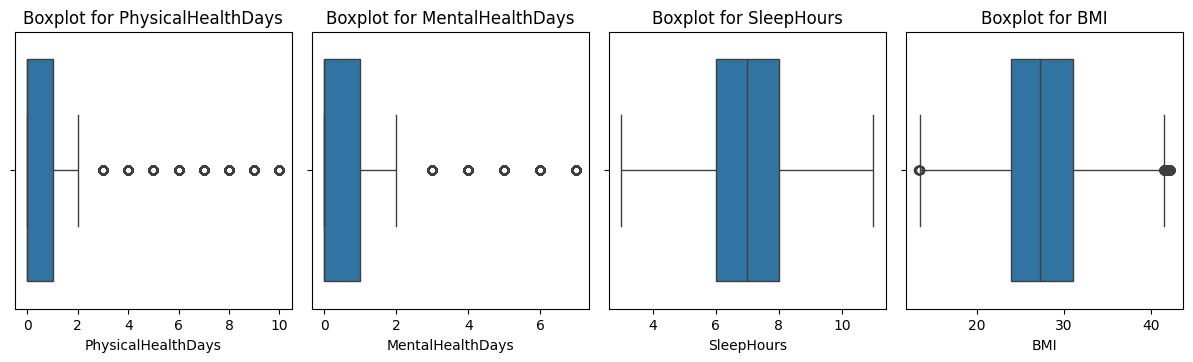

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df):

    numeric_cols = df.select_dtypes(include='number').columns

    plt.figure(figsize=(15, 10))

    for i, col in enumerate(numeric_cols):
        plt.subplot(3, 5, i+1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')

    plt.tight_layout()
    plt.show()

plot_boxplots(df)


Target Distribution:
HadHeartAttack
No     217320
Yes     10754
Name: count, dtype: int64


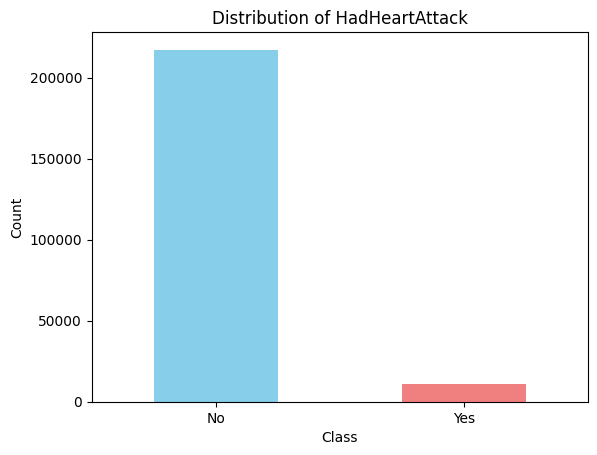

In [ ]:
target_column = 'HadHeartAttack'

target_distribution = df[target_column].value_counts()

print("Target Distribution:")
print(target_distribution)

target_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title(f'Distribution of {target_column}')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Visualization

In [ ]:
# Basic distribution statistics
print(df.describe(include='all'))


       HadHeartAttack   AgeCategory     Sex GeneralHealth  PhysicalHealthDays  \
count          228074        228074  228074        228074       228074.000000   
unique              2            13       2             5                 NaN   
top                No  Age 65 to 69    Male     Very good                 NaN   
freq           217320         25655  116959         89507                 NaN   
mean              NaN           NaN     NaN           NaN            1.049861   
std               NaN           NaN     NaN           NaN            2.192857   
min               NaN           NaN     NaN           NaN            0.000000   
25%               NaN           NaN     NaN           NaN            0.000000   
50%               NaN           NaN     NaN           NaN            0.000000   
75%               NaN           NaN     NaN           NaN            1.000000   
max               NaN           NaN     NaN           NaN           10.000000   

        MentalHealthDays Ph

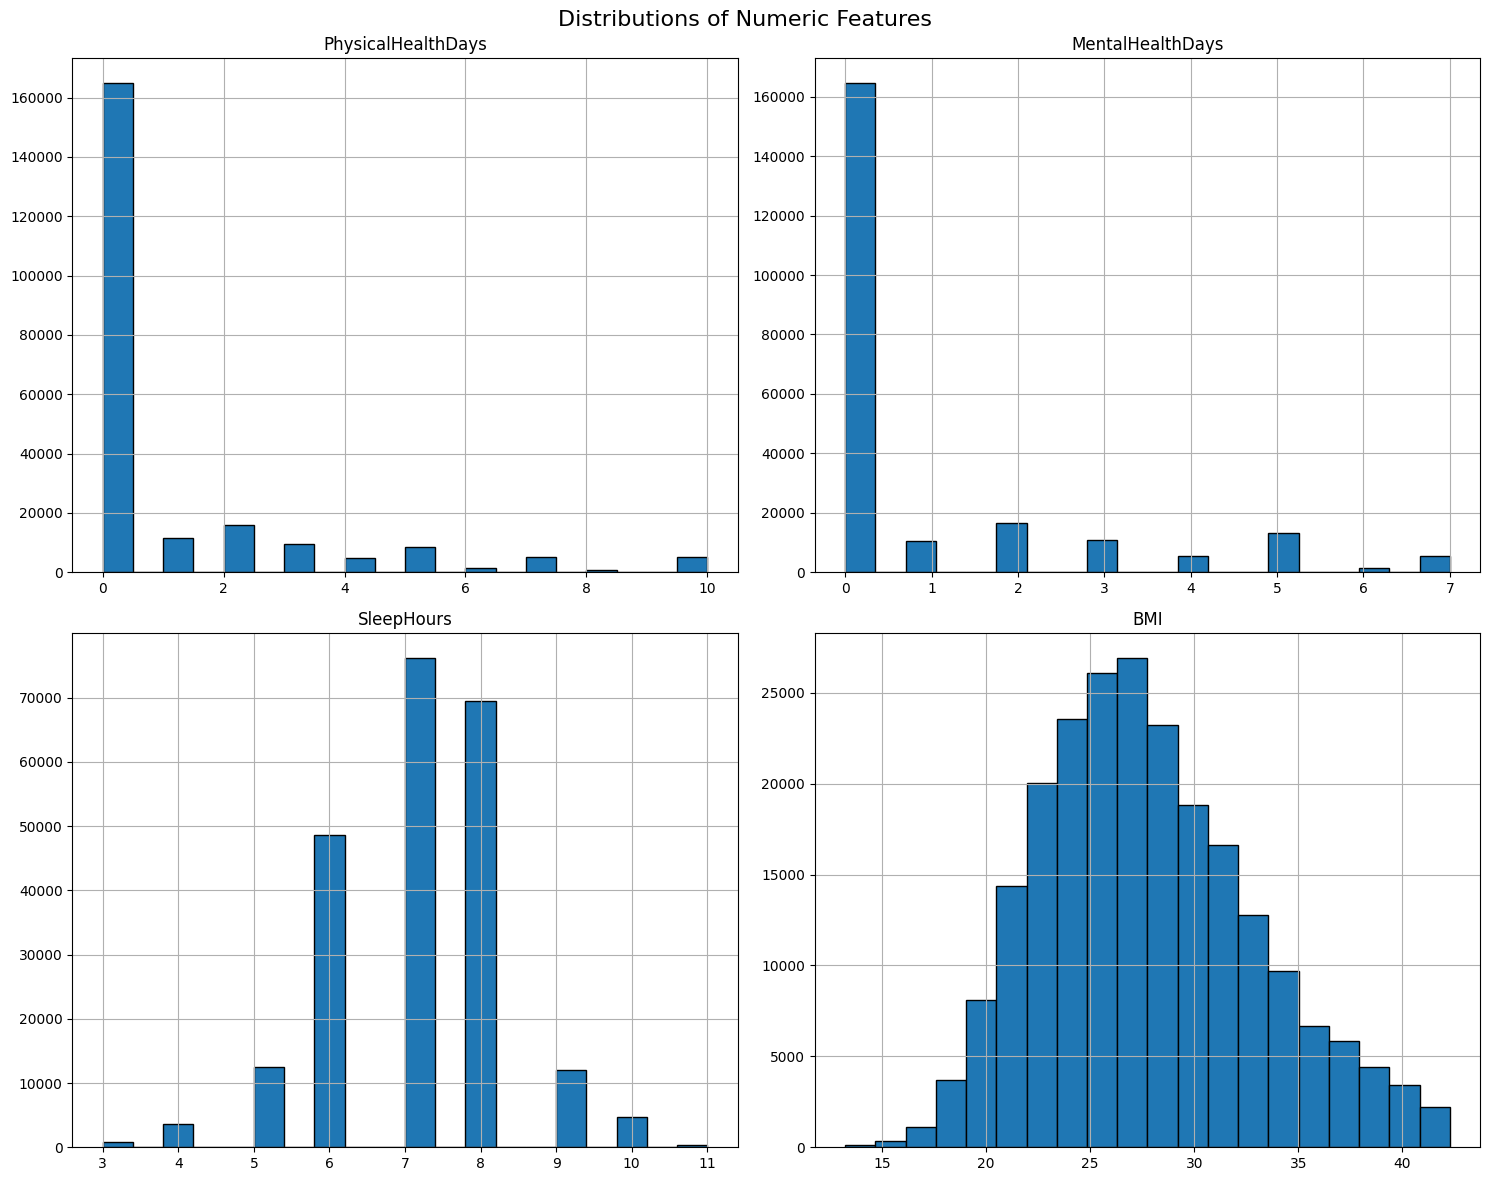

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numeric columns
df.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Encoding

In [ ]:
df_cat=df

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['AgeCategory', 'Sex', 'GeneralHealth', 'PhysicalActivities',
                       'SmokerStatus', 'AlcoholDrinkers']
boolean_columns = ['HadHeartAttack', 'HadDiabetes', 'HadStroke', 'HadAngina',
                   'HadKidneyDisease', 'DifficultyWalking']


df = pd.get_dummies(df_no_outliers, columns=categorical_columns, drop_first=True)


label_encoder = LabelEncoder()
for col in boolean_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   HadHeartAttack  PhysicalHealthDays  MentalHealthDays  SleepHours    BMI  \
1               0                 0.0               0.0         6.0  26.57   
2               0                 2.0               3.0         5.0  25.61   
4               0                 2.0               0.0         9.0  21.77   
5               1                 1.0               0.0         7.0  26.08   
6               0                 0.0               0.0         7.0  22.96   

   HadDiabetes  HadStroke  HadAngina  HadKidneyDisease  DifficultyWalking  \
1            0          0          0                 0                  0   
2            0          0          0                 0                  0   
4            0          0          0                 0                  0   
5            2          1          0                 0                  0   
6            0          0          0                 0                  0   

   ...  Sex_Male  GeneralHealth_Fair  GeneralHealth_Good  GeneralHea

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228074 entries, 1 to 445131
Data columns (total 32 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   HadHeartAttack                                      228074 non-null  int64  
 1   PhysicalHealthDays                                  228074 non-null  float64
 2   MentalHealthDays                                    228074 non-null  float64
 3   SleepHours                                          228074 non-null  float64
 4   BMI                                                 228074 non-null  float64
 5   HadDiabetes                                         228074 non-null  int64  
 6   HadStroke                                           228074 non-null  int64  
 7   HadAngina                                           228074 non-null  int64  
 8   HadKidneyDisease                                    228074 non-null  

In [ ]:
# Convert all boolean columns to integers
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
# Rename complex column names to simpler ones
df.rename(columns={
    'HadHeartAttack': 'HeartAttack',
    'PhysicalHealthDays': 'PhysicalHealth',
    'MentalHealthDays': 'MentalHealth',
    'SleepHours': 'Sleep',
    'BMI': 'BMI',
    'HadDiabetes': 'Diabetes',
    'HadStroke': 'Stroke',
    'HadAngina': 'Angina',
    'HadKidneyDisease': 'KidneyDisease',
    'DifficultyWalking': 'WalkingIssue',

    # Age categories
    'AgeCategory_Age 25 to 29': 'Age_25_29',
    'AgeCategory_Age 30 to 34': 'Age_30_34',
    'AgeCategory_Age 35 to 39': 'Age_35_39',
    'AgeCategory_Age 40 to 44': 'Age_40_44',
    'AgeCategory_Age 45 to 49': 'Age_45_49',
    'AgeCategory_Age 50 to 54': 'Age_50_54',
    'AgeCategory_Age 55 to 59': 'Age_55_59',
    'AgeCategory_Age 60 to 64': 'Age_60_64',
    'AgeCategory_Age 65 to 69': 'Age_65_69',
    'AgeCategory_Age 70 to 74': 'Age_70_74',
    'AgeCategory_Age 75 to 79': 'Age_75_79',
    'AgeCategory_Age 80 or older': 'Age_80_plus',

    # Other categories
    'Sex_Male': 'Male',
    'GeneralHealth_Fair': 'Health_Fair',
    'GeneralHealth_Good': 'Health_Good',
    'GeneralHealth_Poor': 'Health_Poor',
    'GeneralHealth_Very good': 'Health_VGood',
    'PhysicalActivities_Yes': 'Active',
    'SmokerStatus_Current smoker - now smokes some days': 'Smoker_Some',
    'SmokerStatus_Former smoker': 'Smoker_Former',
    'SmokerStatus_Never smoked': 'Smoker_Never',
    'AlcoholDrinkers_Yes': 'DrinksAlcohol'
}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228074 entries, 1 to 445131
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   HeartAttack     228074 non-null  int64  
 1   PhysicalHealth  228074 non-null  float64
 2   MentalHealth    228074 non-null  float64
 3   Sleep           228074 non-null  float64
 4   BMI             228074 non-null  float64
 5   Diabetes        228074 non-null  int64  
 6   Stroke          228074 non-null  int64  
 7   Angina          228074 non-null  int64  
 8   KidneyDisease   228074 non-null  int64  
 9   WalkingIssue    228074 non-null  int64  
 10  Age_25_29       228074 non-null  int64  
 11  Age_30_34       228074 non-null  int64  
 12  Age_35_39       228074 non-null  int64  
 13  Age_40_44       228074 non-null  int64  
 14  Age_45_49       228074 non-null  int64  
 15  Age_50_54       228074 non-null  int64  
 16  Age_55_59       228074 non-null  int64  
 17  Age_60_64      

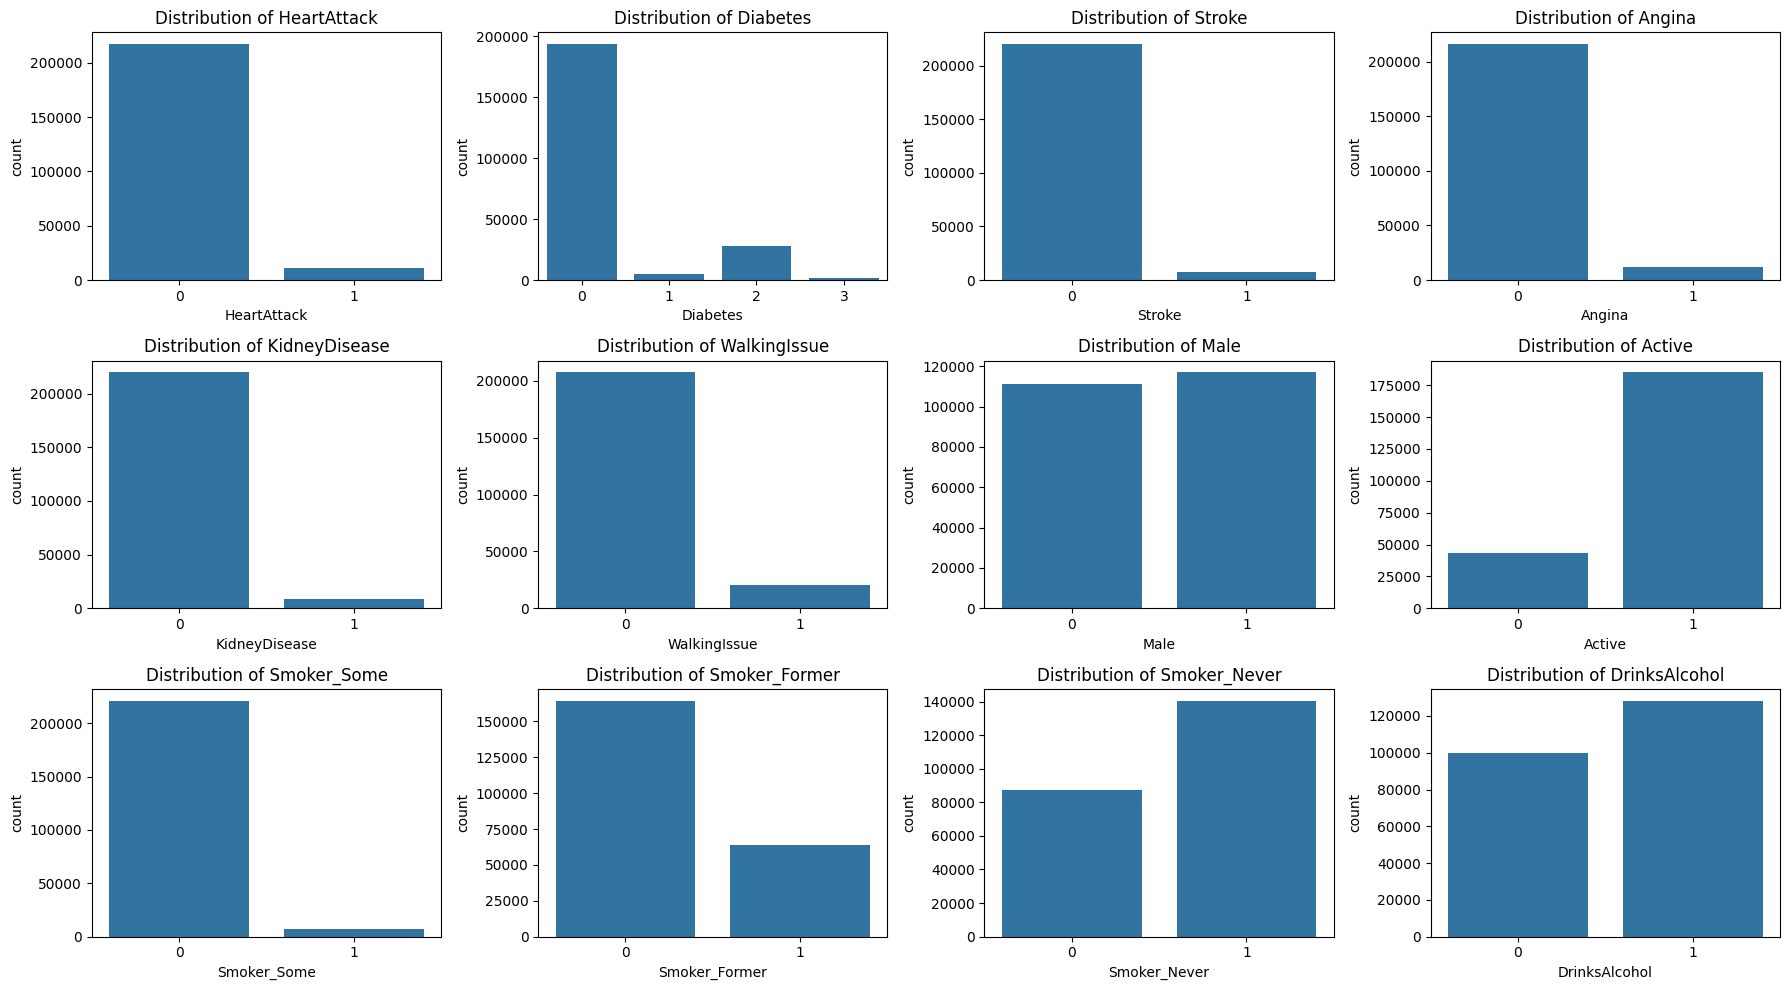

In [ ]:
import seaborn as sns

# Countplots for selected binary/categorical features
binary_cols = ['HeartAttack', 'Diabetes', 'Stroke', 'Angina', 'KidneyDisease', 'WalkingIssue',
               'Male', 'Active', 'Smoker_Some', 'Smoker_Former', 'Smoker_Never', 'DrinksAlcohol']

plt.figure(figsize=(18, 10))
for i, col in enumerate(binary_cols):
    plt.subplot(3, 4, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


# visual2

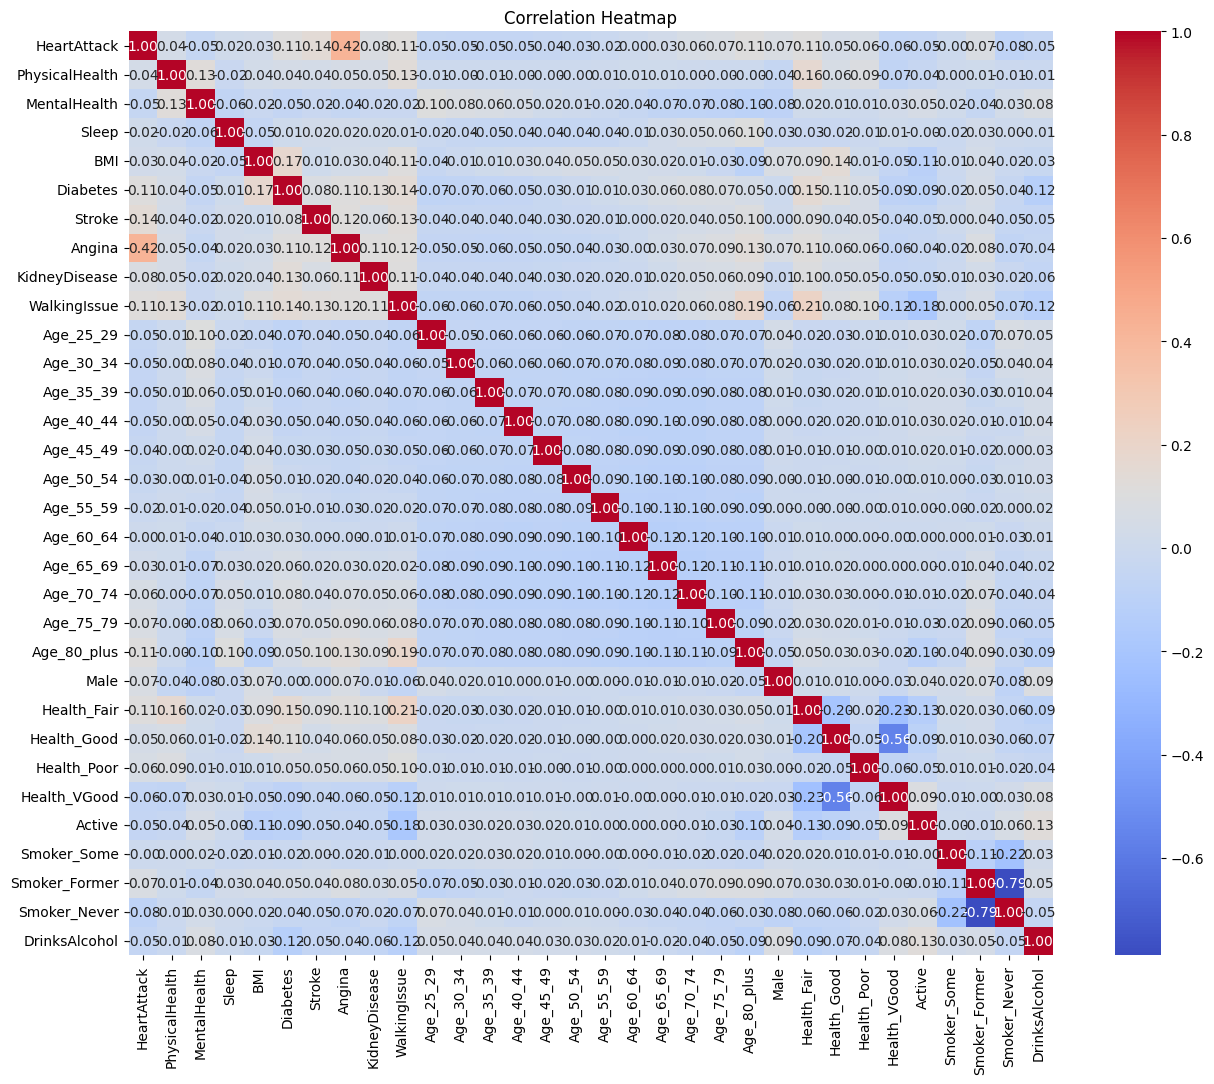

In [ ]:
# Correlation matrix
plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


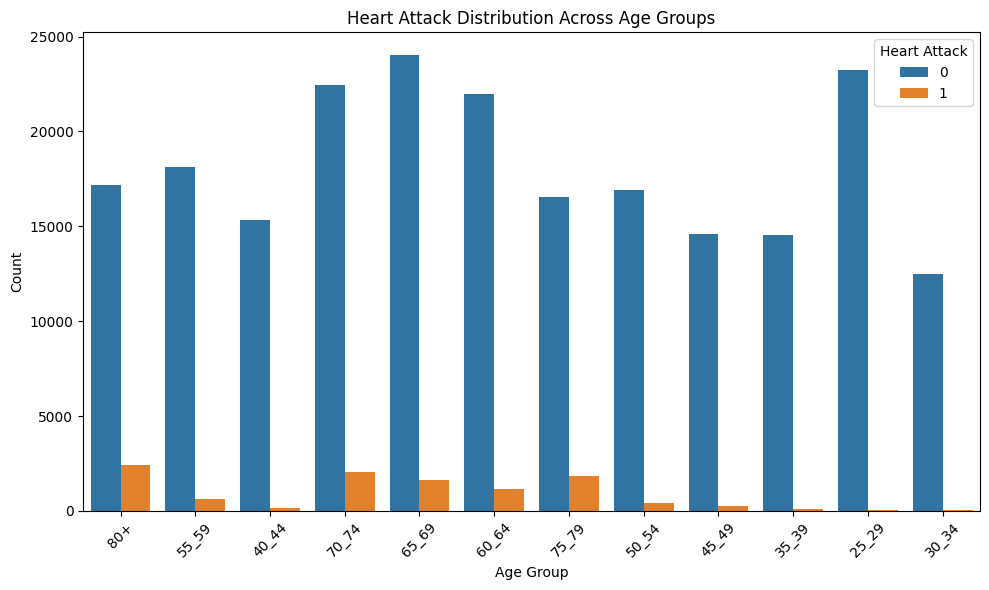

In [ ]:
# Check which age group has more heart attacks
import pandas as pd
age_cols = [col for col in df.columns if col.startswith('Age_')]
df['AgeGroup'] = df[age_cols].idxmax(axis=1).str.replace('Age_', '').str.replace('_plus', '+')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='HeartAttack')
plt.title('Heart Attack Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Heart Attack')
plt.tight_layout()
plt.show()


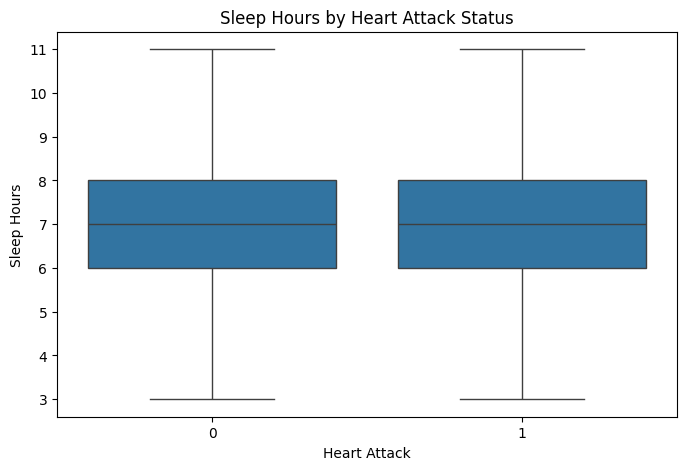

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='HeartAttack', y='Sleep')
plt.title('Sleep Hours by Heart Attack Status')
plt.xlabel('Heart Attack')
plt.ylabel('Sleep Hours')
plt.show()


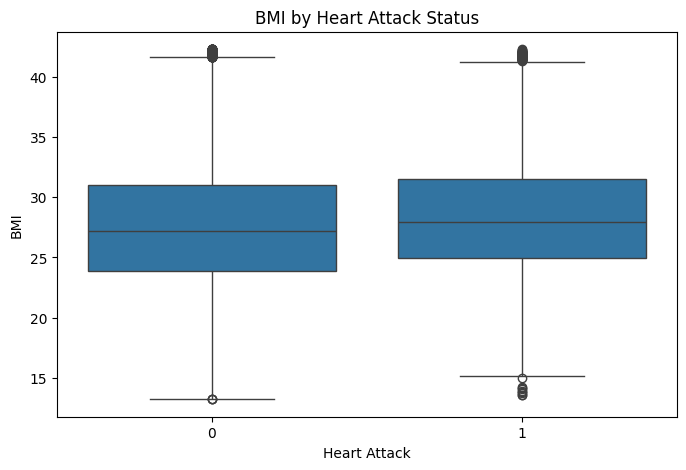

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='HeartAttack', y='BMI')
plt.title('BMI by Heart Attack Status')
plt.xlabel('Heart Attack')
plt.ylabel('BMI')
plt.show()


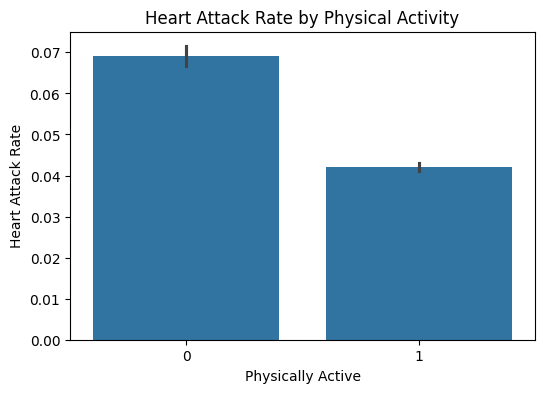

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Active', y='HeartAttack')
plt.title('Heart Attack Rate by Physical Activity')
plt.xlabel('Physically Active')
plt.ylabel('Heart Attack Rate')
plt.show()


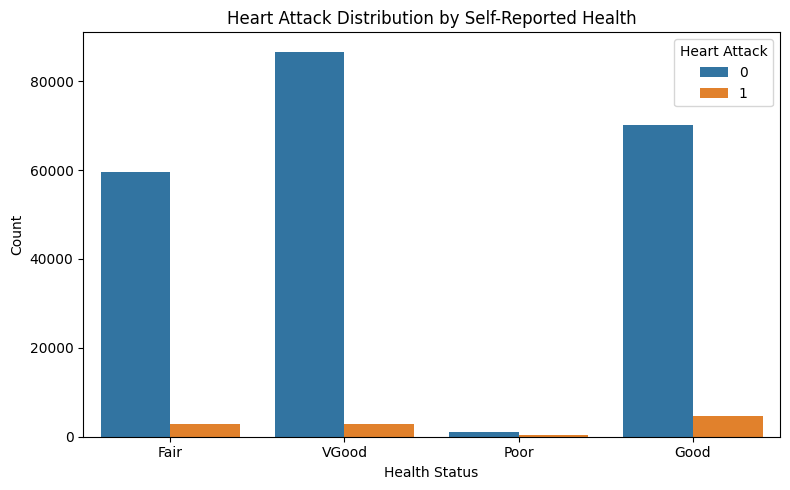

In [ ]:
health_cols = [col for col in df.columns if col.startswith('Health_')]
df['HealthStatus'] = df[health_cols].idxmax(axis=1).str.replace('Health_', '')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='HealthStatus', hue='HeartAttack')
plt.title('Heart Attack Distribution by Self-Reported Health')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.tight_layout()
plt.show()


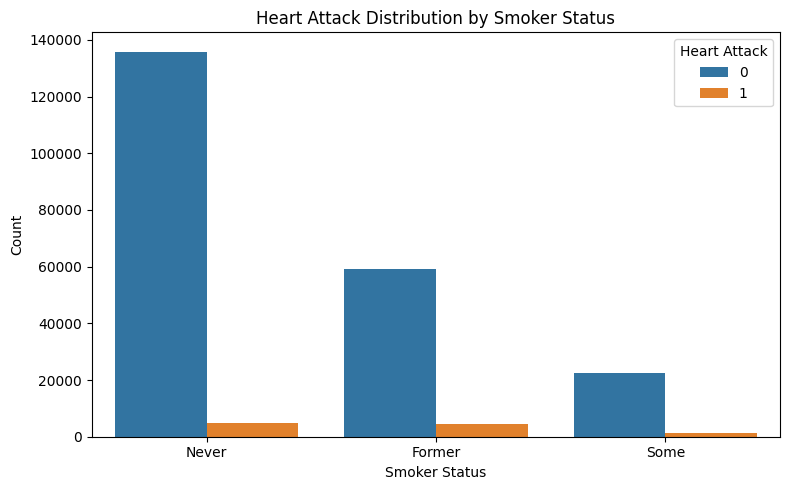

In [ ]:
smoker_cols = [col for col in df.columns if col.startswith('Smoker_')]
df['SmokerStatus'] = df[smoker_cols].idxmax(axis=1).str.replace('Smoker_', '')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SmokerStatus', hue='HeartAttack')
plt.title('Heart Attack Distribution by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns='HeartAttack')
y = df['HeartAttack']




In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['AgeGroup', 'HealthStatus', 'SmokerStatus']


label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # store encoder in case you need to inverse_transform later


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

df = X.copy()
df['HeartAttack'] = y


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


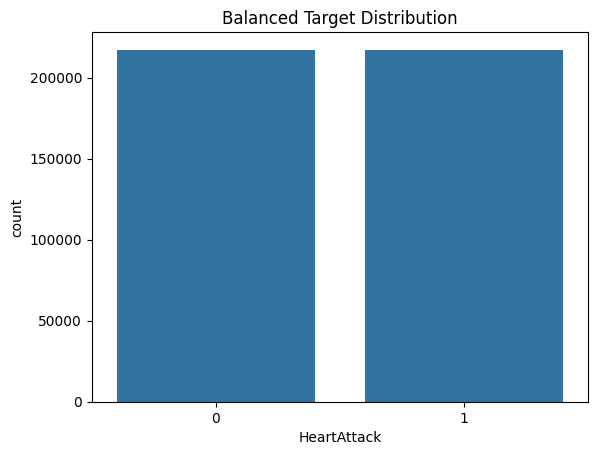

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='HeartAttack')
plt.title('Balanced Target Distribution')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8192

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     43464
           1       0.83      0.80      0.82     43464

    accuracy                           0.82     86928
   macro avg       0.82      0.82      0.82     86928
weighted avg       0.82      0.82      0.82     86928


Confusion Matrix:
[[36378  7086]
 [ 8627 34837]]


In [ ]:
!pip install catboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
import lightgbm as lgb

In [ ]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.05, random_state=42)
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Fit model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print the evaluation metrics for each model
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report for {model_name}:\n{results[model_name]['classification_report']}")
    print(f"Confusion Matrix for {model_name}:\n{results[model_name]['confusion_matrix']}")
    print("="*80)


Training Random Forest...

Random Forest Accuracy: 0.9500

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     43464
           1       0.94      0.96      0.95     43464

    accuracy                           0.95     86928
   macro avg       0.95      0.95      0.95     86928
weighted avg       0.95      0.95      0.95     86928

Confusion Matrix for Random Forest:
[[41023  2441]
 [ 1908 41556]]
Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 173856, number of negative: 173856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 347712, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Accuracy: 0.9155

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     43464
           1       0.93      0.89      0.91     43464

    accuracy                           0.92     86928
   macro avg       0.92      0.92      0.92     86928
weighted avg       0.92      0.92      0.92     86928

Confusion Matrix for LightGBM:
[[40710  2754]
 [ 4588 38876]]


In [ ]:
# Initialize CatBoost
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    silent=True  # disable training output
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on test set
y_pred = catboost_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"CatBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

CatBoost Accuracy: 0.9082

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     43464
           1       0.93      0.88      0.91     43464

    accuracy                           0.91     86928
   macro avg       0.91      0.91      0.91     86928
weighted avg       0.91      0.91      0.91     86928

Confusion Matrix:
 [[40691  2773]
 [ 5210 38254]]
